In [1]:
import os
import sys
import time
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import fetch_openml
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.utils import check_random_state
from sklearn.preprocessing import OneHotEncoder

# Add the parent directory to path to import your modules
os.chdir("../..")
sys.path.append(os.path.dirname(os.path.dirname(os.getcwd())))
from lib import *


Sparsity with L1 penalty: 80.28%
Test score with L1 penalty: 0.8302
Example run in 6.305 s


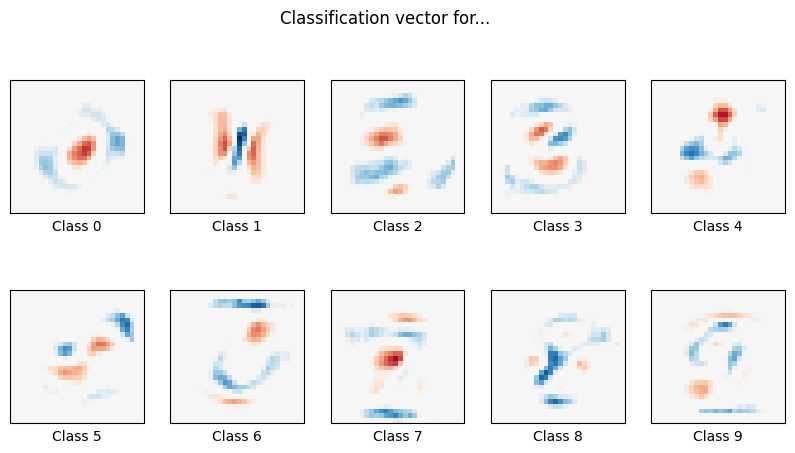

In [2]:
# Authors: The scikit-learn developers
# SPDX-License-Identifier: BSD-3-Clause

# Turn down for faster convergence
t0 = time.time()
train_samples = 5000

# Load data from https://www.openml.org/d/554
X, y = fetch_openml("mnist_784", version=1, return_X_y=True, as_frame=False)

random_state = check_random_state(0)
permutation = random_state.permutation(X.shape[0])
X = X[permutation]
y = y[permutation]
X = X.reshape((X.shape[0], -1))

X_train, X_test, y_train, y_test = train_test_split(
    X, y, train_size=train_samples, test_size=10000
)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Turn up tolerance for faster convergence
clf = LogisticRegression(C=50.0 / train_samples, penalty="l1", solver="saga", tol=0.1)
clf.fit(X_train, y_train)
sparsity = np.mean(clf.coef_ == 0) * 100
score = clf.score(X_test, y_test)
# print('Best C % .4f' % clf.C_)
print("Sparsity with L1 penalty: %.2f%%" % sparsity)
print("Test score with L1 penalty: %.4f" % score)

coef = clf.coef_.copy()
plt.figure(figsize=(10, 5))
scale = np.abs(coef).max()
for i in range(10):
    l1_plot = plt.subplot(2, 5, i + 1)
    l1_plot.imshow(
        coef[i].reshape(28, 28),
        interpolation="nearest",
        cmap=plt.cm.RdBu,
        vmin=-scale,
        vmax=scale,
    )
    l1_plot.set_xticks(())
    l1_plot.set_yticks(())
    l1_plot.set_xlabel("Class %i" % i)
plt.suptitle("Classification vector for...")

run_time = time.time() - t0
print("Example run in %.3f s" % run_time)
plt.show()

In [3]:
# Convert labels to one-hot encoding for neural network
encoder = OneHotEncoder(sparse_output=False)
y_train_onehot = encoder.fit_transform(y_train.reshape(-1, 1))
y_test_onehot = encoder.transform(y_test.reshape(-1, 1))

# Create validation set
X_train, X_val, y_train, y_val = train_test_split(
    X_train, y_train_onehot, test_size=0.2, random_state=42
)

# Print dataset information
print(f"Training set: {X_train.shape[0]} samples")
print(f"Validation set: {X_val.shape[0]} samples")
print(f"Test set: {X_test.shape[0]} samples")
print(f"Input features: {X_train.shape[1]}")
print(f"Output classes: {y_train_onehot.shape[1]}")

Training set: 4000 samples
Validation set: 1000 samples
Test set: 10000 samples
Input features: 784
Output classes: 10


### Pengaruh Depth

In [4]:
# Define depth variations with 3, 4, and 5 layers
depth_variations = [
    [784, 156, 10],
    [784, 156, 156, 10],
    [784, 156, 156, 156, 10]
]


# Define width variations with 128, 156, 184 neurons in the hidden layers
width_variations = [
    [784, 128, 10],
    [784, 328, 10],
    [784, 528, 10]
]

In [5]:
# Create Neural Network
depth_3_network = NeuralNetwork(
    node_counts = depth_variations[0],
    activations = [ReLU()] * (len(depth_variations[0]) - 2) + [Softmax()],
    loss_function = CCE(),
    initialize_methods = NormalInitializer(seed=22)
)

depth_4_network = NeuralNetwork(
    node_counts = depth_variations[1],
    activations = [ReLU()] * (len(depth_variations[1]) - 2) + [Softmax()],
    loss_function = CCE(),
    initialize_methods = NormalInitializer(seed=22)
)

depth_5_network = NeuralNetwork(
    node_counts = depth_variations[2],
    activations = [ReLU()] * (len(depth_variations[2]) - 2) + [Softmax()],
    loss_function = CCE(),
    initialize_methods = NormalInitializer(seed=22)
)

In [6]:
# Create FFNN model
ffnn_depth_3 = FFNN(depth_3_network)

ffnn_depth_4 = FFNN(depth_4_network)

ffnn_depth_5 = FFNN(depth_5_network)

In [7]:
# Train the model
depth_3_history = ffnn_depth_3.fit(
    x_train=X_train,
    y_train=y_train,
    batch_size=32,
    epochs=20,
    validation_data=(X_val, y_val),
    learning_rate=0.01,
    verbose=1
)

depth_4_history = ffnn_depth_4.fit(
    x_train=X_train,
    y_train=y_train,
    batch_size=32,
    epochs=20,
    validation_data=(X_val, y_val),
    learning_rate=0.01,
    verbose=1
)

depth_5_history = ffnn_depth_5.fit(
    x_train=X_train,
    y_train=y_train,
    batch_size=32,
    epochs=20,
    validation_data=(X_val, y_val),
    learning_rate=0.01,
    verbose=1
)

Epoch 1/20: 100%|██████████| 125/125 [00:00<00:00, 191.10it/s, loss=9.9570]


Epoch 1/20 - 0.70s - loss: 9.9570 - val_loss: 4.8452


Epoch 2/20: 100%|██████████| 125/125 [00:00<00:00, 144.44it/s, loss=3.5444]


Epoch 2/20 - 0.90s - loss: 3.5444 - val_loss: 3.3249


Epoch 3/20: 100%|██████████| 125/125 [00:00<00:00, 231.54it/s, loss=2.4339]


Epoch 3/20 - 0.56s - loss: 2.4339 - val_loss: 2.8051


Epoch 4/20: 100%|██████████| 125/125 [00:00<00:00, 331.12it/s, loss=1.8518]


Epoch 4/20 - 0.39s - loss: 1.8518 - val_loss: 2.5232


Epoch 5/20: 100%|██████████| 125/125 [00:00<00:00, 287.48it/s, loss=1.4912]


Epoch 5/20 - 0.45s - loss: 1.4912 - val_loss: 2.3869


Epoch 6/20: 100%|██████████| 125/125 [00:00<00:00, 292.15it/s, loss=1.2449]


Epoch 6/20 - 0.44s - loss: 1.2449 - val_loss: 2.2243


Epoch 7/20: 100%|██████████| 125/125 [00:00<00:00, 222.66it/s, loss=1.0576]


Epoch 7/20 - 0.58s - loss: 1.0576 - val_loss: 2.2392


Epoch 8/20: 100%|██████████| 125/125 [00:00<00:00, 254.91it/s, loss=0.9228]


Epoch 8/20 - 0.52s - loss: 0.9228 - val_loss: 2.1166


Epoch 9/20: 100%|██████████| 125/125 [00:01<00:00, 103.43it/s, loss=0.8217]


Epoch 9/20 - 1.23s - loss: 0.8217 - val_loss: 2.0288


Epoch 10/20: 100%|██████████| 125/125 [00:00<00:00, 132.66it/s, loss=0.7538]


Epoch 10/20 - 0.97s - loss: 0.7538 - val_loss: 2.0263


Epoch 11/20: 100%|██████████| 125/125 [00:00<00:00, 127.56it/s, loss=0.6944]


Epoch 11/20 - 1.01s - loss: 0.6944 - val_loss: 1.9670


Epoch 12/20: 100%|██████████| 125/125 [00:00<00:00, 217.58it/s, loss=0.6301]


Epoch 12/20 - 0.59s - loss: 0.6301 - val_loss: 1.9822


Epoch 13/20: 100%|██████████| 125/125 [00:00<00:00, 247.40it/s, loss=0.5825]


Epoch 13/20 - 0.53s - loss: 0.5825 - val_loss: 1.9290


Epoch 14/20: 100%|██████████| 125/125 [00:00<00:00, 256.91it/s, loss=0.5478]


Epoch 14/20 - 0.51s - loss: 0.5478 - val_loss: 1.8987


Epoch 15/20: 100%|██████████| 125/125 [00:00<00:00, 213.24it/s, loss=0.5181]


Epoch 15/20 - 0.61s - loss: 0.5181 - val_loss: 1.8891


Epoch 16/20: 100%|██████████| 125/125 [00:00<00:00, 215.57it/s, loss=0.4881]


Epoch 16/20 - 0.61s - loss: 0.4881 - val_loss: 1.8645


Epoch 17/20: 100%|██████████| 125/125 [00:01<00:00, 123.70it/s, loss=0.4612]


Epoch 17/20 - 1.03s - loss: 0.4612 - val_loss: 1.8762


Epoch 18/20: 100%|██████████| 125/125 [00:01<00:00, 124.15it/s, loss=0.4419]


Epoch 18/20 - 1.03s - loss: 0.4419 - val_loss: 1.8297


Epoch 19/20: 100%|██████████| 125/125 [00:00<00:00, 186.60it/s, loss=0.4228]


Epoch 19/20 - 0.70s - loss: 0.4228 - val_loss: 1.8235


Epoch 20/20: 100%|██████████| 125/125 [00:00<00:00, 245.49it/s, loss=0.4096]


Epoch 20/20 - 0.53s - loss: 0.4096 - val_loss: 1.8233


Epoch 1/20: 100%|██████████| 125/125 [00:00<00:00, 256.14it/s, loss=15.3501]


Epoch 1/20 - 0.51s - loss: 15.3501 - val_loss: 10.0490


Epoch 2/20: 100%|██████████| 125/125 [00:00<00:00, 239.79it/s, loss=8.3880]


Epoch 2/20 - 0.54s - loss: 8.3880 - val_loss: 8.3515


Epoch 3/20: 100%|██████████| 125/125 [00:00<00:00, 198.86it/s, loss=6.7475]


Epoch 3/20 - 0.74s - loss: 6.7475 - val_loss: 6.9042


Epoch 4/20: 100%|██████████| 125/125 [00:00<00:00, 162.12it/s, loss=4.0753]


Epoch 4/20 - 0.79s - loss: 4.0753 - val_loss: 5.1717


Epoch 5/20: 100%|██████████| 125/125 [00:00<00:00, 165.64it/s, loss=2.8369]


Epoch 5/20 - 0.78s - loss: 2.8369 - val_loss: 4.3821


Epoch 6/20: 100%|██████████| 125/125 [00:00<00:00, 149.41it/s, loss=2.3628]


Epoch 6/20 - 0.87s - loss: 2.3628 - val_loss: 4.3737


Epoch 7/20: 100%|██████████| 125/125 [00:01<00:00, 118.43it/s, loss=1.9926]


Epoch 7/20 - 1.09s - loss: 1.9926 - val_loss: 3.6969


Epoch 8/20: 100%|██████████| 125/125 [00:00<00:00, 166.82it/s, loss=1.8740]


Epoch 8/20 - 0.77s - loss: 1.8740 - val_loss: 3.7168


Epoch 9/20: 100%|██████████| 125/125 [00:00<00:00, 200.78it/s, loss=1.6597]


Epoch 9/20 - 0.72s - loss: 1.6597 - val_loss: 3.6516


Epoch 10/20: 100%|██████████| 125/125 [00:00<00:00, 184.38it/s, loss=1.5040]


Epoch 10/20 - 0.70s - loss: 1.5040 - val_loss: 3.5499


Epoch 11/20: 100%|██████████| 125/125 [00:00<00:00, 167.00it/s, loss=1.4676]


Epoch 11/20 - 0.77s - loss: 1.4676 - val_loss: 3.7026


Epoch 12/20: 100%|██████████| 125/125 [00:00<00:00, 191.48it/s, loss=1.4196]


Epoch 12/20 - 0.69s - loss: 1.4196 - val_loss: 3.6775


Epoch 13/20: 100%|██████████| 125/125 [00:00<00:00, 158.18it/s, loss=1.3837]


Epoch 13/20 - 0.81s - loss: 1.3837 - val_loss: 3.6078


Epoch 14/20: 100%|██████████| 125/125 [00:01<00:00, 120.11it/s, loss=1.3540]


Epoch 14/20 - 1.06s - loss: 1.3540 - val_loss: 3.6026


Epoch 15/20: 100%|██████████| 125/125 [00:01<00:00, 123.89it/s, loss=1.3099]


Epoch 15/20 - 1.04s - loss: 1.3099 - val_loss: 3.5821


Epoch 16/20: 100%|██████████| 125/125 [00:00<00:00, 189.95it/s, loss=1.2993]


Epoch 16/20 - 0.68s - loss: 1.2993 - val_loss: 3.5830


Epoch 17/20: 100%|██████████| 125/125 [00:00<00:00, 221.08it/s, loss=1.2913]


Epoch 17/20 - 0.58s - loss: 1.2913 - val_loss: 3.6118


Epoch 18/20: 100%|██████████| 125/125 [00:00<00:00, 216.70it/s, loss=1.2812]


Epoch 18/20 - 0.59s - loss: 1.2812 - val_loss: 3.6101


Epoch 19/20: 100%|██████████| 125/125 [00:00<00:00, 195.27it/s, loss=1.2583]


Epoch 19/20 - 0.65s - loss: 1.2583 - val_loss: 3.6074


Epoch 20/20: 100%|██████████| 125/125 [00:00<00:00, 202.95it/s, loss=1.2518]


Epoch 20/20 - 0.65s - loss: 1.2518 - val_loss: 3.6582


Epoch 1/20: 100%|██████████| 125/125 [00:00<00:00, 130.52it/s, loss=25.1346]


Epoch 1/20 - 0.99s - loss: 25.1346 - val_loss: 21.5169


Epoch 2/20: 100%|██████████| 125/125 [00:00<00:00, 140.95it/s, loss=20.5800]


Epoch 2/20 - 0.90s - loss: 20.5800 - val_loss: 19.9170


Epoch 3/20: 100%|██████████| 125/125 [00:00<00:00, 131.51it/s, loss=19.5078]


Epoch 3/20 - 0.97s - loss: 19.5078 - val_loss: 19.4887


Epoch 4/20: 100%|██████████| 125/125 [00:01<00:00, 108.94it/s, loss=18.7187]


Epoch 4/20 - 1.16s - loss: 18.7187 - val_loss: 19.1896


Epoch 5/20: 100%|██████████| 125/125 [00:01<00:00, 93.03it/s, loss=17.4317]


Epoch 5/20 - 1.37s - loss: 17.4317 - val_loss: 16.9661


Epoch 6/20: 100%|██████████| 125/125 [00:01<00:00, 117.24it/s, loss=15.9664]


Epoch 6/20 - 1.10s - loss: 15.9664 - val_loss: 16.5285


Epoch 7/20: 100%|██████████| 125/125 [00:00<00:00, 142.71it/s, loss=15.9554]


Epoch 7/20 - 0.91s - loss: 15.9554 - val_loss: 16.3520


Epoch 8/20: 100%|██████████| 125/125 [00:00<00:00, 139.93it/s, loss=15.6551]


Epoch 8/20 - 0.91s - loss: 15.6551 - val_loss: 16.6866


Epoch 9/20: 100%|██████████| 125/125 [00:01<00:00, 121.89it/s, loss=15.4723]


Epoch 9/20 - 1.05s - loss: 15.4723 - val_loss: 15.3706


Epoch 10/20: 100%|██████████| 125/125 [00:00<00:00, 130.79it/s, loss=15.2339]


Epoch 10/20 - 0.99s - loss: 15.2339 - val_loss: 16.3858


Epoch 11/20: 100%|██████████| 125/125 [00:00<00:00, 137.40it/s, loss=14.9720]


Epoch 11/20 - 0.94s - loss: 14.9720 - val_loss: 16.1028


Epoch 12/20: 100%|██████████| 125/125 [00:01<00:00, 95.44it/s, loss=14.3129] 


Epoch 12/20 - 1.35s - loss: 14.3129 - val_loss: 14.3047


Epoch 13/20: 100%|██████████| 125/125 [00:01<00:00, 122.59it/s, loss=13.7584]


Epoch 13/20 - 1.05s - loss: 13.7584 - val_loss: 14.1474


Epoch 14/20: 100%|██████████| 125/125 [00:01<00:00, 117.56it/s, loss=13.5380]


Epoch 14/20 - 1.09s - loss: 13.5380 - val_loss: 13.9874


Epoch 15/20: 100%|██████████| 125/125 [00:01<00:00, 124.84it/s, loss=13.6194]


Epoch 15/20 - 1.04s - loss: 13.6194 - val_loss: 13.5213


Epoch 16/20: 100%|██████████| 125/125 [00:01<00:00, 110.43it/s, loss=13.0353]


Epoch 16/20 - 1.15s - loss: 13.0353 - val_loss: 13.4411


Epoch 17/20: 100%|██████████| 125/125 [00:00<00:00, 133.04it/s, loss=13.0305]


Epoch 17/20 - 0.96s - loss: 13.0305 - val_loss: 13.3666


Epoch 18/20: 100%|██████████| 125/125 [00:00<00:00, 143.44it/s, loss=12.9848]


Epoch 18/20 - 0.90s - loss: 12.9848 - val_loss: 13.5954


Epoch 19/20: 100%|██████████| 125/125 [00:01<00:00, 120.72it/s, loss=12.5044]


Epoch 19/20 - 1.05s - loss: 12.5044 - val_loss: 12.8163


Epoch 20/20: 100%|██████████| 125/125 [00:01<00:00, 121.82it/s, loss=12.6895]

Epoch 20/20 - 1.04s - loss: 12.6895 - val_loss: 13.5890


In [8]:
# Evaluate the model
evaluate_model(ffnn_depth_3, X_test, y_test_onehot)

evaluate_model(ffnn_depth_4, X_test, y_test_onehot)

evaluate_model(ffnn_depth_5, X_test, y_test_onehot)


----- Model Performance Summary -----
Metric               Value     
------------------------------
Accuracy             0.8261000000
Precision (macro)    0.8252719956
Recall (macro)       0.8247380541
F1 Score (macro)     0.8246522041
------------------------------

----- Model Performance Summary -----
Metric               Value     
------------------------------
Accuracy             0.8561000000
Precision (macro)    0.8563643810
Recall (macro)       0.8553187346
F1 Score (macro)     0.8554198561
------------------------------

----- Model Performance Summary -----
Metric               Value     
------------------------------
Accuracy             0.6013000000
Precision (macro)    0.5329740945
Recall (macro)       0.5961679071
F1 Score (macro)     0.4967579579
------------------------------


/home/dovodedomo/Tugas-Besar-I-ML/myenv/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


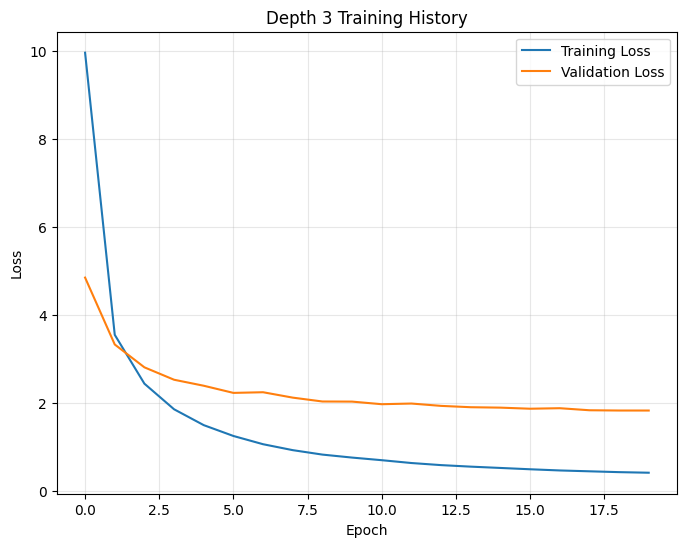

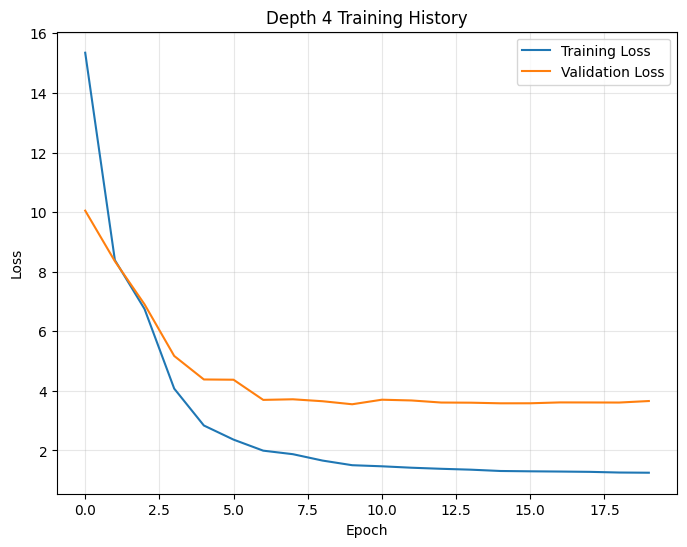

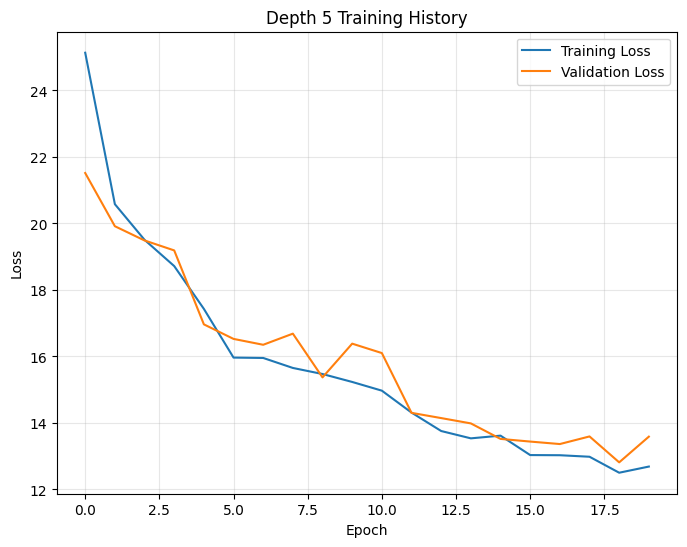

In [9]:
# Plot the training history
plot_training_loss(depth_3_history, "Depth 3 Training History")

plot_training_loss(depth_4_history, "Depth 4 Training History")

plot_training_loss(depth_5_history, "Depth 5 Training History")

### Pengaruh Width

In [10]:
# Create Neural Network
width_128_network = NeuralNetwork(
    node_counts = width_variations[0],
    activations = [ReLU()] * (len(width_variations[0]) - 2) + [Softmax()],
    loss_function = CCE(),
    initialize_methods = NormalInitializer(seed=22)
)

width_328_network = NeuralNetwork(
    node_counts = width_variations[1],
    activations = [ReLU()] * (len(width_variations[1]) - 2) + [Softmax()],
    loss_function = CCE(),
    initialize_methods = NormalInitializer(seed=22)
)

width_528_network = NeuralNetwork(
    node_counts = width_variations[2],
    activations = [ReLU()] * (len(width_variations[2]) - 2) + [Softmax()],
    loss_function = CCE(),
    initialize_methods = NormalInitializer(seed=22)
)

In [11]:
# Create FFNN model
ffnn_width_128 = FFNN(width_128_network)

ffnn_width_328 = FFNN(width_328_network)

ffnn_width_528 = FFNN(width_528_network)

In [12]:
# Train the model
width_128_history = ffnn_width_128.fit(
    x_train=X_train,
    y_train=y_train,
    batch_size=32,
    epochs=20,
    validation_data=(X_val, y_val),
    learning_rate=0.01,
    verbose=1
)

width_328_history = ffnn_width_328.fit(
    x_train=X_train,
    y_train=y_train,
    batch_size=32,
    epochs=20,
    validation_data=(X_val, y_val),
    learning_rate=0.01,
    verbose=1
)

width_528_history = ffnn_width_528.fit(
    x_train=X_train,
    y_train=y_train,
    batch_size=32,
    epochs=20,
    validation_data=(X_val, y_val),
    learning_rate=0.01,
    verbose=1
)

Epoch 1/20: 100%|██████████| 125/125 [00:00<00:00, 272.43it/s, loss=10.2406]


Epoch 1/20 - 0.47s - loss: 10.2406 - val_loss: 5.2492


Epoch 2/20: 100%|██████████| 125/125 [00:00<00:00, 248.24it/s, loss=3.9389]


Epoch 2/20 - 0.53s - loss: 3.9389 - val_loss: 3.4942


Epoch 3/20: 100%|██████████| 125/125 [00:00<00:00, 259.90it/s, loss=2.6309]


Epoch 3/20 - 0.50s - loss: 2.6309 - val_loss: 2.8003


Epoch 4/20: 100%|██████████| 125/125 [00:00<00:00, 248.38it/s, loss=1.9736]


Epoch 4/20 - 0.52s - loss: 1.9736 - val_loss: 2.4232


Epoch 5/20: 100%|██████████| 125/125 [00:00<00:00, 265.64it/s, loss=1.5809]


Epoch 5/20 - 0.54s - loss: 1.5809 - val_loss: 2.1911


Epoch 6/20: 100%|██████████| 125/125 [00:00<00:00, 258.81it/s, loss=1.3071]


Epoch 6/20 - 0.55s - loss: 1.3071 - val_loss: 2.1052


Epoch 7/20: 100%|██████████| 125/125 [00:00<00:00, 285.13it/s, loss=1.1016]


Epoch 7/20 - 0.47s - loss: 1.1016 - val_loss: 1.9863


Epoch 8/20: 100%|██████████| 125/125 [00:00<00:00, 270.77it/s, loss=0.9408]


Epoch 8/20 - 0.47s - loss: 0.9408 - val_loss: 1.9287


Epoch 9/20: 100%|██████████| 125/125 [00:00<00:00, 303.81it/s, loss=0.8211]


Epoch 9/20 - 0.44s - loss: 0.8211 - val_loss: 1.8492


Epoch 10/20: 100%|██████████| 125/125 [00:00<00:00, 361.30it/s, loss=0.7373]


Epoch 10/20 - 0.36s - loss: 0.7373 - val_loss: 1.8112


Epoch 11/20: 100%|██████████| 125/125 [00:00<00:00, 297.60it/s, loss=0.6669]


Epoch 11/20 - 0.44s - loss: 0.6669 - val_loss: 1.8075


Epoch 12/20: 100%|██████████| 125/125 [00:00<00:00, 316.51it/s, loss=0.6092]


Epoch 12/20 - 0.41s - loss: 0.6092 - val_loss: 1.7812


Epoch 13/20: 100%|██████████| 125/125 [00:00<00:00, 325.75it/s, loss=0.5640]


Epoch 13/20 - 0.40s - loss: 0.5640 - val_loss: 1.7521


Epoch 14/20: 100%|██████████| 125/125 [00:00<00:00, 324.51it/s, loss=0.5297]


Epoch 14/20 - 0.40s - loss: 0.5297 - val_loss: 1.7380


Epoch 15/20: 100%|██████████| 125/125 [00:00<00:00, 282.64it/s, loss=0.4968]


Epoch 15/20 - 0.47s - loss: 0.4968 - val_loss: 1.7366


Epoch 16/20: 100%|██████████| 125/125 [00:00<00:00, 286.45it/s, loss=0.4697]


Epoch 16/20 - 0.46s - loss: 0.4697 - val_loss: 1.7235


Epoch 17/20: 100%|██████████| 125/125 [00:00<00:00, 267.46it/s, loss=0.4469]


Epoch 17/20 - 0.49s - loss: 0.4469 - val_loss: 1.6989


Epoch 18/20: 100%|██████████| 125/125 [00:00<00:00, 323.13it/s, loss=0.4253]


Epoch 18/20 - 0.40s - loss: 0.4253 - val_loss: 1.6990


Epoch 19/20: 100%|██████████| 125/125 [00:00<00:00, 321.36it/s, loss=0.4076]


Epoch 19/20 - 0.42s - loss: 0.4076 - val_loss: 1.6898


Epoch 20/20: 100%|██████████| 125/125 [00:00<00:00, 260.64it/s, loss=0.3930]


Epoch 20/20 - 0.51s - loss: 0.3930 - val_loss: 1.6820


Epoch 1/20: 100%|██████████| 125/125 [00:00<00:00, 145.12it/s, loss=10.7375]


Epoch 1/20 - 0.88s - loss: 10.7375 - val_loss: 5.7360


Epoch 2/20: 100%|██████████| 125/125 [00:00<00:00, 187.30it/s, loss=4.3800]


Epoch 2/20 - 0.68s - loss: 4.3800 - val_loss: 4.1856


Epoch 3/20: 100%|██████████| 125/125 [00:00<00:00, 193.67it/s, loss=2.9749]


Epoch 3/20 - 0.66s - loss: 2.9749 - val_loss: 3.5479


Epoch 4/20: 100%|██████████| 125/125 [00:00<00:00, 217.74it/s, loss=2.2230]


Epoch 4/20 - 0.59s - loss: 2.2230 - val_loss: 3.1693


Epoch 5/20: 100%|██████████| 125/125 [00:00<00:00, 207.28it/s, loss=1.7519]


Epoch 5/20 - 0.62s - loss: 1.7519 - val_loss: 2.8984


Epoch 6/20: 100%|██████████| 125/125 [00:00<00:00, 147.67it/s, loss=1.4299]


Epoch 6/20 - 0.86s - loss: 1.4299 - val_loss: 2.7573


Epoch 7/20: 100%|██████████| 125/125 [00:00<00:00, 193.32it/s, loss=1.2120]


Epoch 7/20 - 0.67s - loss: 1.2120 - val_loss: 2.8801


Epoch 8/20: 100%|██████████| 125/125 [00:00<00:00, 170.07it/s, loss=1.0829]


Epoch 8/20 - 0.75s - loss: 1.0829 - val_loss: 2.7140


Epoch 9/20: 100%|██████████| 125/125 [00:00<00:00, 157.77it/s, loss=0.9910]


Epoch 9/20 - 0.81s - loss: 0.9910 - val_loss: 2.6254


Epoch 10/20: 100%|██████████| 125/125 [00:00<00:00, 205.76it/s, loss=0.9367]


Epoch 10/20 - 0.62s - loss: 0.9367 - val_loss: 2.6440


Epoch 11/20: 100%|██████████| 125/125 [00:00<00:00, 141.83it/s, loss=0.9051]


Epoch 11/20 - 0.90s - loss: 0.9051 - val_loss: 2.5740


Epoch 12/20: 100%|██████████| 125/125 [00:00<00:00, 130.51it/s, loss=0.8801]


Epoch 12/20 - 0.97s - loss: 0.8801 - val_loss: 2.5672


Epoch 13/20: 100%|██████████| 125/125 [00:01<00:00, 117.66it/s, loss=0.8546]


Epoch 13/20 - 1.08s - loss: 0.8546 - val_loss: 2.5243


Epoch 14/20: 100%|██████████| 125/125 [00:00<00:00, 125.33it/s, loss=0.8406]


Epoch 14/20 - 1.02s - loss: 0.8406 - val_loss: 2.5262


Epoch 15/20: 100%|██████████| 125/125 [00:00<00:00, 127.93it/s, loss=0.8277]


Epoch 15/20 - 1.00s - loss: 0.8277 - val_loss: 2.5268


Epoch 16/20: 100%|██████████| 125/125 [00:01<00:00, 113.28it/s, loss=0.8136]


Epoch 16/20 - 1.12s - loss: 0.8136 - val_loss: 2.5221


Epoch 17/20: 100%|██████████| 125/125 [00:00<00:00, 127.75it/s, loss=0.8020]


Epoch 17/20 - 1.00s - loss: 0.8020 - val_loss: 2.5282


Epoch 18/20: 100%|██████████| 125/125 [00:01<00:00, 117.10it/s, loss=0.7952]


Epoch 18/20 - 1.08s - loss: 0.7952 - val_loss: 2.5193


Epoch 19/20: 100%|██████████| 125/125 [00:01<00:00, 91.95it/s, loss=0.7899]


Epoch 19/20 - 1.39s - loss: 0.7899 - val_loss: 2.5106


Epoch 20/20: 100%|██████████| 125/125 [00:01<00:00, 88.91it/s, loss=0.7870]


Epoch 20/20 - 1.43s - loss: 0.7870 - val_loss: 2.5067


Epoch 1/20: 100%|██████████| 125/125 [00:01<00:00, 91.23it/s, loss=13.9726] 


Epoch 1/20 - 1.40s - loss: 13.9726 - val_loss: 7.2546


Epoch 2/20: 100%|██████████| 125/125 [00:01<00:00, 120.02it/s, loss=5.2330]


Epoch 2/20 - 1.06s - loss: 5.2330 - val_loss: 5.3007


Epoch 3/20: 100%|██████████| 125/125 [00:01<00:00, 109.74it/s, loss=3.3862]


Epoch 3/20 - 1.16s - loss: 3.3862 - val_loss: 4.3959


Epoch 4/20: 100%|██████████| 125/125 [00:01<00:00, 85.20it/s, loss=2.6197]


Epoch 4/20 - 1.50s - loss: 2.6197 - val_loss: 4.1249


Epoch 5/20: 100%|██████████| 125/125 [00:01<00:00, 87.85it/s, loss=2.2464] 


Epoch 5/20 - 1.44s - loss: 2.2464 - val_loss: 3.9343


Epoch 6/20: 100%|██████████| 125/125 [00:01<00:00, 83.53it/s, loss=1.9499]


Epoch 6/20 - 1.52s - loss: 1.9499 - val_loss: 3.5980


Epoch 7/20: 100%|██████████| 125/125 [00:01<00:00, 100.06it/s, loss=1.7577]


Epoch 7/20 - 1.27s - loss: 1.7577 - val_loss: 3.5646


Epoch 8/20: 100%|██████████| 125/125 [00:01<00:00, 79.02it/s, loss=1.6350]


Epoch 8/20 - 1.61s - loss: 1.6350 - val_loss: 3.5189


Epoch 9/20: 100%|██████████| 125/125 [00:01<00:00, 94.07it/s, loss=1.5484] 


Epoch 9/20 - 1.35s - loss: 1.5484 - val_loss: 3.4409


Epoch 10/20: 100%|██████████| 125/125 [00:01<00:00, 84.51it/s, loss=1.4763]


Epoch 10/20 - 1.51s - loss: 1.4763 - val_loss: 3.4961


Epoch 11/20: 100%|██████████| 125/125 [00:01<00:00, 91.78it/s, loss=1.4344] 


Epoch 11/20 - 1.39s - loss: 1.4344 - val_loss: 3.4673


Epoch 12/20: 100%|██████████| 125/125 [00:01<00:00, 70.25it/s, loss=1.3372]


Epoch 12/20 - 1.81s - loss: 1.3372 - val_loss: 3.4332


Epoch 13/20: 100%|██████████| 125/125 [00:01<00:00, 74.40it/s, loss=1.2973]


Epoch 13/20 - 1.71s - loss: 1.2973 - val_loss: 3.4078


Epoch 14/20: 100%|██████████| 125/125 [00:01<00:00, 79.39it/s, loss=1.2762]


Epoch 14/20 - 1.60s - loss: 1.2762 - val_loss: 3.3869


Epoch 15/20: 100%|██████████| 125/125 [00:01<00:00, 81.18it/s, loss=1.2692]


Epoch 15/20 - 1.56s - loss: 1.2692 - val_loss: 3.3570


Epoch 16/20: 100%|██████████| 125/125 [00:01<00:00, 80.52it/s, loss=1.2615]


Epoch 16/20 - 1.58s - loss: 1.2615 - val_loss: 3.3688


Epoch 17/20: 100%|██████████| 125/125 [00:01<00:00, 65.66it/s, loss=1.2577]


Epoch 17/20 - 1.94s - loss: 1.2577 - val_loss: 3.3487


Epoch 18/20: 100%|██████████| 125/125 [00:01<00:00, 101.52it/s, loss=1.2543]


Epoch 18/20 - 1.26s - loss: 1.2543 - val_loss: 3.3605


Epoch 19/20: 100%|██████████| 125/125 [00:01<00:00, 109.15it/s, loss=1.2508]


Epoch 19/20 - 1.18s - loss: 1.2508 - val_loss: 3.3322


Epoch 20/20: 100%|██████████| 125/125 [00:01<00:00, 115.57it/s, loss=1.2460]


Epoch 20/20 - 1.12s - loss: 1.2460 - val_loss: 3.3243


In [13]:
# Evaluate the model
evaluate_model(ffnn_width_128, X_test, y_test_onehot)

evaluate_model(ffnn_width_328, X_test, y_test_onehot)

evaluate_model(ffnn_width_528, X_test, y_test_onehot)


----- Model Performance Summary -----
Metric               Value     
------------------------------
Accuracy             0.8260000000
Precision (macro)    0.8249842077
Recall (macro)       0.8248066871
F1 Score (macro)     0.8247831286
------------------------------

----- Model Performance Summary -----
Metric               Value     
------------------------------
Accuracy             0.8345000000
Precision (macro)    0.8329224847
Recall (macro)       0.8336821656
F1 Score (macro)     0.8330194002
------------------------------

----- Model Performance Summary -----
Metric               Value     
------------------------------
Accuracy             0.8371000000
Precision (macro)    0.8363164880
Recall (macro)       0.8362335689
F1 Score (macro)     0.8356682365
------------------------------


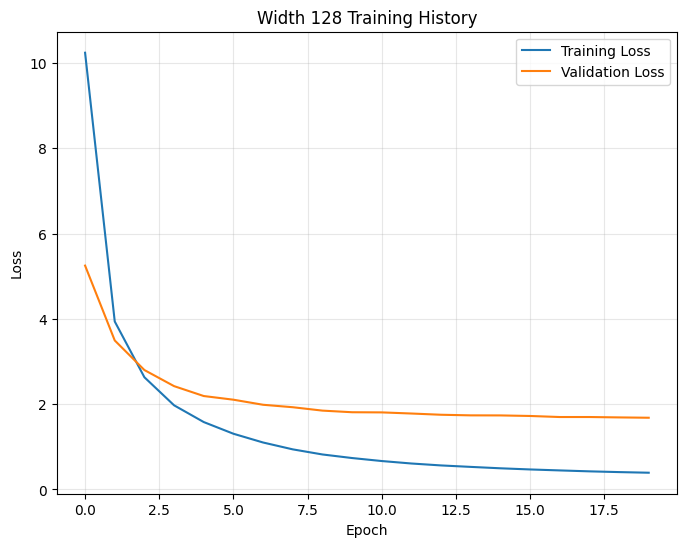

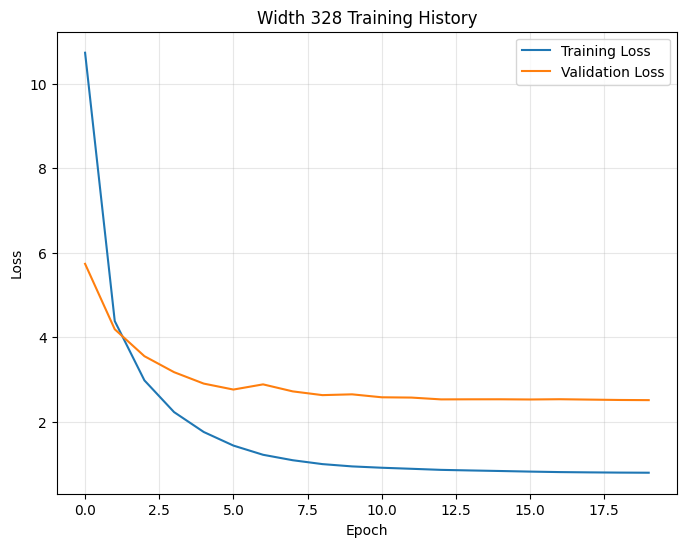

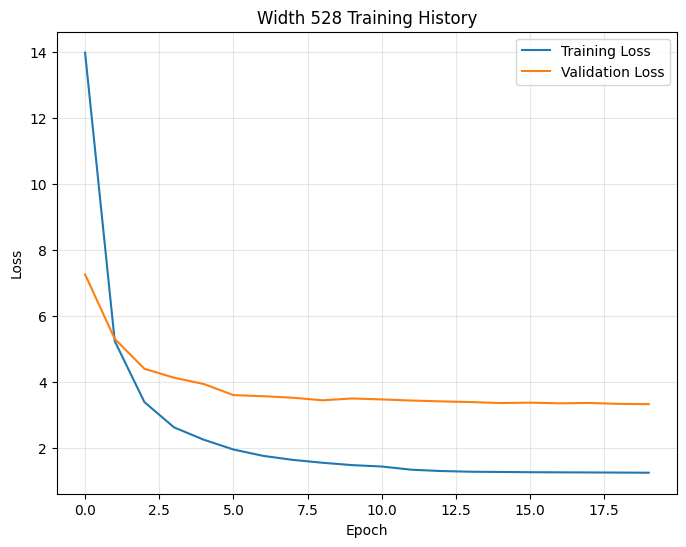

In [14]:
# Plot the training history
plot_training_loss(width_128_history, "Width 128 Training History")

plot_training_loss(width_328_history, "Width 328 Training History")

plot_training_loss(width_528_history, "Width 528 Training History")